In [3]:
# import required packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [37]:
# original data
d = pd.read_csv("./asos_routine.csv")
d.head()

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,...,mslp,p01m,vsby,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,VTN,2021-11-01 00:52,-100.5489,42.8567,789.24,39.9,24.1,52.88,37.72,3.45,...,1028.4,0.0,10.0,NaN,OVC,NaN,NaN,8000.0,NaN,NaN
1,OMA,2021-11-01 00:52,-95.8992,41.3103,295.67,42.1,27.0,54.78,37.69,6.90,...,1027.2,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
2,ODX,2021-11-01 00:53,-98.9517,41.6236,628.41,39.9,28.0,62.15,36.65,4.60,...,1028.1,0.0,10.0,NaN,OVC,NaN,NaN,8000.0,NaN,NaN
3,SNY,2021-11-01 00:53,-102.9847,41.1014,1303.84,33.1,30.9,91.51,23.40,13.80,...,1026.0,0.0,9.0,NaN,FEW,OVC,NaN,700.0,1200.0,NaN
4,BFF,2021-11-01 00:53,-103.5956,41.8740,1203.49,34.0,NaN,NaN,NaN,12.65,...,1026.8,NaN,4.0,NaN,BKN,OVC,NaN,700.0,1500.0,NaN


In [40]:
# filter by march, april, may 2022
#d_filtered = d[d['valid'].str.contains(r'2022-03|2022-04|2022-05')]
d_filtered = d
d_filtered

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,...,mslp,p01m,vsby,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,VTN,2021-11-01 00:52,-100.5489,42.8567,789.24,39.9,24.1,52.88,37.72,3.45,...,1028.4,0.0,10.0,NaN,OVC,NaN,NaN,8000.0,NaN,NaN
1,OMA,2021-11-01 00:52,-95.8992,41.3103,295.67,42.1,27.0,54.78,37.69,6.90,...,1027.2,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
2,ODX,2021-11-01 00:53,-98.9517,41.6236,628.41,39.9,28.0,62.15,36.65,4.60,...,1028.1,0.0,10.0,NaN,OVC,NaN,NaN,8000.0,NaN,NaN
3,SNY,2021-11-01 00:53,-102.9847,41.1014,1303.84,33.1,30.9,91.51,23.40,13.80,...,1026.0,0.0,9.0,NaN,FEW,OVC,NaN,700.0,1200.0,NaN
4,BFF,2021-11-01 00:53,-103.5956,41.8740,1203.49,34.0,NaN,NaN,NaN,12.65,...,1026.8,NaN,4.0,NaN,BKN,OVC,NaN,700.0,1500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372212,GGF,2022-10-31 23:55,-101.7329,40.8695,1043.00,60.8,14.0,15.78,60.80,6.90,...,NaN,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372213,FET,2022-10-31 23:55,-96.5200,41.4500,362.00,63.7,31.1,29.28,63.70,5.75,...,NaN,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
372214,OLU,2022-10-31 23:56,-97.3426,41.4480,438.39,61.0,28.9,29.45,61.00,8.05,...,1012.3,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
372215,EAR,2022-10-31 23:56,-99.0068,40.7270,649.64,57.9,30.0,34.41,57.90,5.75,...,1012.1,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN


In [41]:
d_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372217 entries, 0 to 372216
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   station    372217 non-null  object 
 1   valid      372217 non-null  object 
 2   lon        372217 non-null  float64
 3   lat        372217 non-null  float64
 4   elevation  372217 non-null  float64
 5   tmpf       371356 non-null  float64
 6   dwpf       371258 non-null  float64
 7   relh       371239 non-null  float64
 8   feel       370293 non-null  float64
 9   sped       368566 non-null  float64
 10  alti       371813 non-null  float64
 11  mslp       196901 non-null  float64
 12  p01m       364561 non-null  float64
 13  vsby       371222 non-null  float64
 14  gust_mph   85121 non-null   float64
 15  skyc1      369580 non-null  object 
 16  skyc2      35982 non-null   object 
 17  skyc3      11915 non-null   object 
 18  skyl1      117536 non-null  float64
 19  skyl2      35982 non-nu

In [42]:
# column types to numerics
d_filtered['tmpf'] = pd.to_numeric(d_filtered['tmpf'], errors='coerce')
d_filtered['dwpf'] = pd.to_numeric(d_filtered['dwpf'], errors='coerce')
d_filtered['relh'] = pd.to_numeric(d_filtered['relh'], errors='coerce')
d_filtered['feel'] = pd.to_numeric(d_filtered['feel'], errors='coerce')
d_filtered['sped'] = pd.to_numeric(d_filtered['sped'], errors='coerce')
d_filtered['alti'] = pd.to_numeric(d_filtered['alti'], errors='coerce')
d_filtered['mslp'] = pd.to_numeric(d_filtered['mslp'], errors='coerce')
d_filtered['p01m'] = pd.to_numeric(d_filtered['p01m'], errors='coerce')
d_filtered['vsby'] = pd.to_numeric(d_filtered['vsby'], errors='coerce')
d_filtered.dtypes

station       object
valid         object
lon          float64
lat          float64
elevation    float64
tmpf         float64
dwpf         float64
relh         float64
feel         float64
sped         float64
alti         float64
mslp         float64
p01m         float64
vsby         float64
gust_mph     float64
skyc1         object
skyc2         object
skyc3         object
skyl1        float64
skyl2        float64
skyl3        float64
dtype: object

In [43]:
lengths = d_filtered["valid"].str.len()
lengths.value_counts()

16    372217
Name: valid, dtype: int64

In [44]:
# sperating valid(YYYY-MM-DD) to Year, month, day columns
d_filtered['valid']= pd.to_datetime(d_filtered["valid"])
#Creating a column of year
d_filtered['year'] = d_filtered.valid.dt.year

#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 
d_filtered['month'] = d_filtered.valid.dt.month

d_filtered['day'] = d_filtered.valid.dt.day

d_filtered.head()

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,...,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,year,month,day
0,VTN,2021-11-01 00:52:00,-100.5489,42.8567,789.24,39.9,24.1,52.88,37.72,3.45,...,NaN,OVC,NaN,NaN,8000.0,NaN,NaN,2021,11,1
1,OMA,2021-11-01 00:52:00,-95.8992,41.3103,295.67,42.1,27.0,54.78,37.69,6.90,...,NaN,CLR,NaN,NaN,NaN,NaN,NaN,2021,11,1
2,ODX,2021-11-01 00:53:00,-98.9517,41.6236,628.41,39.9,28.0,62.15,36.65,4.60,...,NaN,OVC,NaN,NaN,8000.0,NaN,NaN,2021,11,1
3,SNY,2021-11-01 00:53:00,-102.9847,41.1014,1303.84,33.1,30.9,91.51,23.40,13.80,...,NaN,FEW,OVC,NaN,700.0,1200.0,NaN,2021,11,1
4,BFF,2021-11-01 00:53:00,-103.5956,41.8740,1203.49,34.0,NaN,NaN,NaN,12.65,...,NaN,BKN,OVC,NaN,700.0,1500.0,NaN,2021,11,1


In [45]:
# treating cartegorical values
s = (d_filtered.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['station', 'skyc1', 'skyc2', 'skyc3']


In [46]:
# treating cartegorical values
for i in object_cols:
    print(i, d_filtered[i].isnull().sum())

station 0
skyc1 2637
skyc2 336235
skyc3 360302


In [47]:
for i in object_cols:
    d_filtered[i].fillna(d_filtered[i].mode()[0], inplace=True)

In [48]:
# treating numerical values
t = (d_filtered.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['lon', 'lat', 'elevation', 'tmpf', 'dwpf', 'relh', 'feel', 'sped', 'alti', 'mslp', 'p01m', 'vsby', 'gust_mph', 'skyl1', 'skyl2', 'skyl3']


In [49]:
# treating numerical values
for i in num_cols:
    print(i, d_filtered[i].isnull().sum())

lon 0
lat 0
elevation 0
tmpf 861
dwpf 959
relh 978
feel 1924
sped 3651
alti 404
mslp 175316
p01m 7656
vsby 995
gust_mph 287096
skyl1 254681
skyl2 336235
skyl3 360302


In [50]:
# treating numerical values
for i in num_cols:
    d_filtered[i].fillna(d_filtered[i].median(), inplace=True)
    
d_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372217 entries, 0 to 372216
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    372217 non-null  object        
 1   valid      372217 non-null  datetime64[ns]
 2   lon        372217 non-null  float64       
 3   lat        372217 non-null  float64       
 4   elevation  372217 non-null  float64       
 5   tmpf       372217 non-null  float64       
 6   dwpf       372217 non-null  float64       
 7   relh       372217 non-null  float64       
 8   feel       372217 non-null  float64       
 9   sped       372217 non-null  float64       
 10  alti       372217 non-null  float64       
 11  mslp       372217 non-null  float64       
 12  p01m       372217 non-null  float64       
 13  vsby       372217 non-null  float64       
 14  gust_mph   372217 non-null  float64       
 15  skyc1      372217 non-null  object        
 16  skyc2      372217 no

In [51]:
# remove valid column - we dont need anymore
d_wo_valid = d_filtered.drop(columns="valid")
d_wo_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372217 entries, 0 to 372216
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   station    372217 non-null  object 
 1   lon        372217 non-null  float64
 2   lat        372217 non-null  float64
 3   elevation  372217 non-null  float64
 4   tmpf       372217 non-null  float64
 5   dwpf       372217 non-null  float64
 6   relh       372217 non-null  float64
 7   feel       372217 non-null  float64
 8   sped       372217 non-null  float64
 9   alti       372217 non-null  float64
 10  mslp       372217 non-null  float64
 11  p01m       372217 non-null  float64
 12  vsby       372217 non-null  float64
 13  gust_mph   372217 non-null  float64
 14  skyc1      372217 non-null  object 
 15  skyc2      372217 non-null  object 
 16  skyc3      372217 non-null  object 
 17  skyl1      372217 non-null  float64
 18  skyl2      372217 non-null  float64
 19  skyl3      372217 non-n

In [52]:
for i in d_wo_valid.columns:
    print(i)

station
lon
lat
elevation
tmpf
dwpf
relh
feel
sped
alti
mslp
p01m
vsby
gust_mph
skyc1
skyc2
skyc3
skyl1
skyl2
skyl3
year
month
day


In [53]:
# encoding categorical values to indexing. ex) station AAA to 1 or skylevel clear to 1
label_encoder = LabelEncoder()
for i in object_cols:
    d_wo_valid[i] = label_encoder.fit_transform(d_wo_valid[i])
    
d_wo_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372217 entries, 0 to 372216
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   station    372217 non-null  int32  
 1   lon        372217 non-null  float64
 2   lat        372217 non-null  float64
 3   elevation  372217 non-null  float64
 4   tmpf       372217 non-null  float64
 5   dwpf       372217 non-null  float64
 6   relh       372217 non-null  float64
 7   feel       372217 non-null  float64
 8   sped       372217 non-null  float64
 9   alti       372217 non-null  float64
 10  mslp       372217 non-null  float64
 11  p01m       372217 non-null  float64
 12  vsby       372217 non-null  float64
 13  gust_mph   372217 non-null  float64
 14  skyc1      372217 non-null  int32  
 15  skyc2      372217 non-null  int32  
 16  skyc3      372217 non-null  int32  
 17  skyl1      372217 non-null  float64
 18  skyl2      372217 non-null  float64
 19  skyl3      372217 non-n

In [54]:
d_wo_valid

,station,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,alti,...,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,year,month,day
0,43,-100.5489,42.8567,789.24,39.9,24.1,52.88,37.72,3.45,30.31,...,26.45,3,0,2,8000.0,6500.0,8000.0,2021,11,1
1,37,-95.8992,41.3103,295.67,42.1,27.0,54.78,37.69,6.90,30.31,...,26.45,1,0,2,5000.0,6500.0,8000.0,2021,11,1
2,32,-98.9517,41.6236,628.41,39.9,28.0,62.15,36.65,4.60,30.31,...,26.45,3,0,2,8000.0,6500.0,8000.0,2021,11,1
3,40,-102.9847,41.1014,1303.84,33.1,30.9,91.51,23.40,13.80,30.24,...,26.45,2,2,2,700.0,1200.0,8000.0,2021,11,1
4,9,-103.5956,41.8740,1203.49,34.0,33.6,59.26,52.00,12.65,30.27,...,26.45,0,2,2,700.0,1500.0,8000.0,2021,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372212,17,-101.7329,40.8695,1043.00,60.8,14.0,15.78,60.80,6.90,29.89,...,26.45,1,0,2,5000.0,6500.0,8000.0,2022,10,31
372213,15,-96.5200,41.4500,362.00,63.7,31.1,29.28,63.70,5.75,29.88,...,26.45,1,0,2,5000.0,6500.0,8000.0,2022,10,31
372214,36,-97.3426,41.4480,438.39,61.0,28.9,29.45,61.00,8.05,29.87,...,26.45,1,0,2,5000.0,6500.0,8000.0,2022,10,31
372215,14,-99.0068,40.7270,649.64,57.9,30.0,34.41,57.90,5.75,29.88,...,26.45,1,0,2,5000.0,6500.0,8000.0,2022,10,31


In [55]:
# finding most frequent values. ex) if we have 15hours of clear sky, that day is clear.
def countmax(series):
      return series.value_counts().argmax()

In [56]:
# Prepairing attributes of scale data
# Group by 'station', 'year', 'month', 'day' and mean of every variable. precipitation is sum for the day

    
grouped = d_wo_valid.groupby(['station', 'year', 'month', 'day']).agg({'lon':'mean', 'lat':'mean', 'elevation':'mean', 'tmpf':'mean',
                                                               'dwpf':'mean', 'relh':'mean', 'feel':'mean',
                                                               'alti':'mean', 'mslp':'mean', 'p01m':'sum',
                                                               'vsby':'mean', 'skyc1':countmax, 'skyc2':countmax,
                                                               'skyc3':countmax, 'skyl1':'mean', 'skyl2':'mean',
                                                               'skyl3':'mean'}).reset_index()
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15661 entries, 0 to 15660
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    15661 non-null  int64  
 1   year       15661 non-null  int64  
 2   month      15661 non-null  int64  
 3   day        15661 non-null  int64  
 4   lon        15661 non-null  float64
 5   lat        15661 non-null  float64
 6   elevation  15661 non-null  float64
 7   tmpf       15661 non-null  float64
 8   dwpf       15661 non-null  float64
 9   relh       15661 non-null  float64
 10  feel       15661 non-null  float64
 11  alti       15661 non-null  float64
 12  mslp       15661 non-null  float64
 13  p01m       15661 non-null  float64
 14  vsby       15661 non-null  float64
 15  skyc1      15661 non-null  int64  
 16  skyc2      15661 non-null  int64  
 17  skyc3      15661 non-null  int64  
 18  skyl1      15661 non-null  float64
 19  skyl2      15661 non-null  float64
 20  skyl3 

In [57]:
grouped

,station,year,month,day,lon,lat,elevation,tmpf,dwpf,relh,...,alti,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,0,2021,11,1,-103.9950,41.5117,1602.91,29.145833,27.562500,93.718750,...,30.256667,1027.533333,0.0,3.452917,0,0,0,404.166667,5850.000000,7833.333333
1,0,2021,11,2,-103.9950,41.5117,1602.91,33.370833,31.445833,92.686250,...,30.267083,1028.095833,0.0,4.129583,0,0,0,912.500000,6366.666667,8000.000000
2,0,2021,11,3,-103.9950,41.5117,1602.91,41.130435,34.447826,80.194348,...,30.260435,1025.630435,0.0,7.254348,0,0,0,3665.217391,6500.000000,8000.000000
3,0,2021,11,4,-103.9950,41.5117,1602.91,47.091304,30.860870,56.218261,...,30.146522,1019.752174,0.0,10.000000,0,0,0,5000.000000,6500.000000,8000.000000
4,0,2021,11,5,-103.9950,41.5117,1602.91,54.620833,27.370833,37.591250,...,30.029167,1013.533333,0.0,10.000000,0,0,0,9125.000000,7187.500000,8000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15656,43,2022,10,27,-100.5489,42.8567,789.24,43.254167,34.079167,73.226250,...,29.964167,1015.845833,0.0,9.072917,0,0,0,5404.166667,7000.000000,8000.000000
15657,43,2022,10,28,-100.5489,42.8567,789.24,42.662500,26.487500,65.780417,...,30.196250,1024.087500,0.0,9.333333,0,0,0,5000.000000,6500.000000,8000.000000
15658,43,2022,10,29,-100.5489,42.8567,789.24,49.612500,23.800000,41.829583,...,30.123750,1020.725000,0.0,10.000000,0,0,0,5000.000000,6500.000000,8000.000000
15659,43,2022,10,30,-100.5489,42.8567,789.24,42.937500,21.716667,48.524583,...,30.088750,1020.141667,0.0,10.000000,0,0,0,5000.000000,6500.000000,8000.000000


In [74]:
# copy precipitation to precipitation tmrw column
# if precipitation is above 1mm = 1 ifelse less than 1mm = 0
grouped['p01m_tmrw'] = grouped['p01m']

grouped["p01m_tmrw"] = np.where(grouped["p01m_tmrw"] >= 1, 1, 0)
grouped["p01m"] = np.where(grouped["p01m"] >= 1, 1, 0)

# saved on 11/21/2022 18:30
grouped
#grouped.to_csv("data_out.csv")
#grouped.to_csv("data_out_all_date.csv")

,station,year,month,day,lon,lat,elevation,tmpf,dwpf,relh,...,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,p01m_tmrw
0,0,2021,11,1,-103.9950,41.5117,1602.91,29.145833,27.562500,93.718750,...,1027.533333,0,3.452917,0,0,0,404.166667,5850.000000,7833.333333,0
1,0,2021,11,2,-103.9950,41.5117,1602.91,33.370833,31.445833,92.686250,...,1028.095833,0,4.129583,0,0,0,912.500000,6366.666667,8000.000000,0
2,0,2021,11,3,-103.9950,41.5117,1602.91,41.130435,34.447826,80.194348,...,1025.630435,0,7.254348,0,0,0,3665.217391,6500.000000,8000.000000,0
3,0,2021,11,4,-103.9950,41.5117,1602.91,47.091304,30.860870,56.218261,...,1019.752174,0,10.000000,0,0,0,5000.000000,6500.000000,8000.000000,0
4,0,2021,11,5,-103.9950,41.5117,1602.91,54.620833,27.370833,37.591250,...,1013.533333,0,10.000000,0,0,0,9125.000000,7187.500000,8000.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15656,43,2022,10,27,-100.5489,42.8567,789.24,43.254167,34.079167,73.226250,...,1015.845833,0,9.072917,0,0,0,5404.166667,7000.000000,8000.000000,0
15657,43,2022,10,28,-100.5489,42.8567,789.24,42.662500,26.487500,65.780417,...,1024.087500,0,9.333333,0,0,0,5000.000000,6500.000000,8000.000000,0
15658,43,2022,10,29,-100.5489,42.8567,789.24,49.612500,23.800000,41.829583,...,1020.725000,0,10.000000,0,0,0,5000.000000,6500.000000,8000.000000,0
15659,43,2022,10,30,-100.5489,42.8567,789.24,42.937500,21.716667,48.524583,...,1020.141667,0,10.000000,0,0,0,5000.000000,6500.000000,8000.000000,0


In [83]:
# precipitation tmrw column has been treated
# second day pushed to first day
# last date May 31 deleted because every row pushed one up
# Load treated csv file

#data_for_ann = pd.read_csv("./data_out.csv")
data_for_ann = pd.read_csv("./data_out_all_date.csv")

In [84]:
features = data_for_ann.drop(['station', 'lon', 'lat', 'p01m_tmrw','year', 'day', 'month'], axis=1) # dropping target and extra columns       
target = data_for_ann['p01m_tmrw']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
elevation,15660.0,-5.807757e-17,1.000032,-1.151096,-0.867975,-0.249398,0.804726,2.519148
tmpf,15660.0,-8.348650e-17,1.000032,-2.933251,-0.721786,-0.061124,0.911850,2.343146
dwpf,15660.0,1.560835e-16,1.000032,-2.533025,-0.777327,-0.112107,0.879213,2.063366
relh,15660.0,3.167042e-16,1.000032,-3.288346,-0.691911,-0.007831,0.701066,2.961969
feel,15660.0,-3.157968e-16,1.000032,-3.360385,-0.717492,0.007639,0.897166,2.099757
alti,15660.0,-1.235963e-14,1.000032,-3.333539,-0.554937,0.062387,0.652981,3.227649
mslp,15660.0,-9.811479e-15,1.000032,-4.519169,-0.117639,-0.012116,0.063204,4.768308
p01m,15660.0,2.858505e-17,1.000032,-0.354010,-0.354010,-0.354010,-0.354010,2.824776
vsby,15660.0,-1.665193e-15,1.000032,-9.204901,0.168728,0.364266,0.364266,46.546916
skyc1,15660.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\yooki\anaconda3\envs\py\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


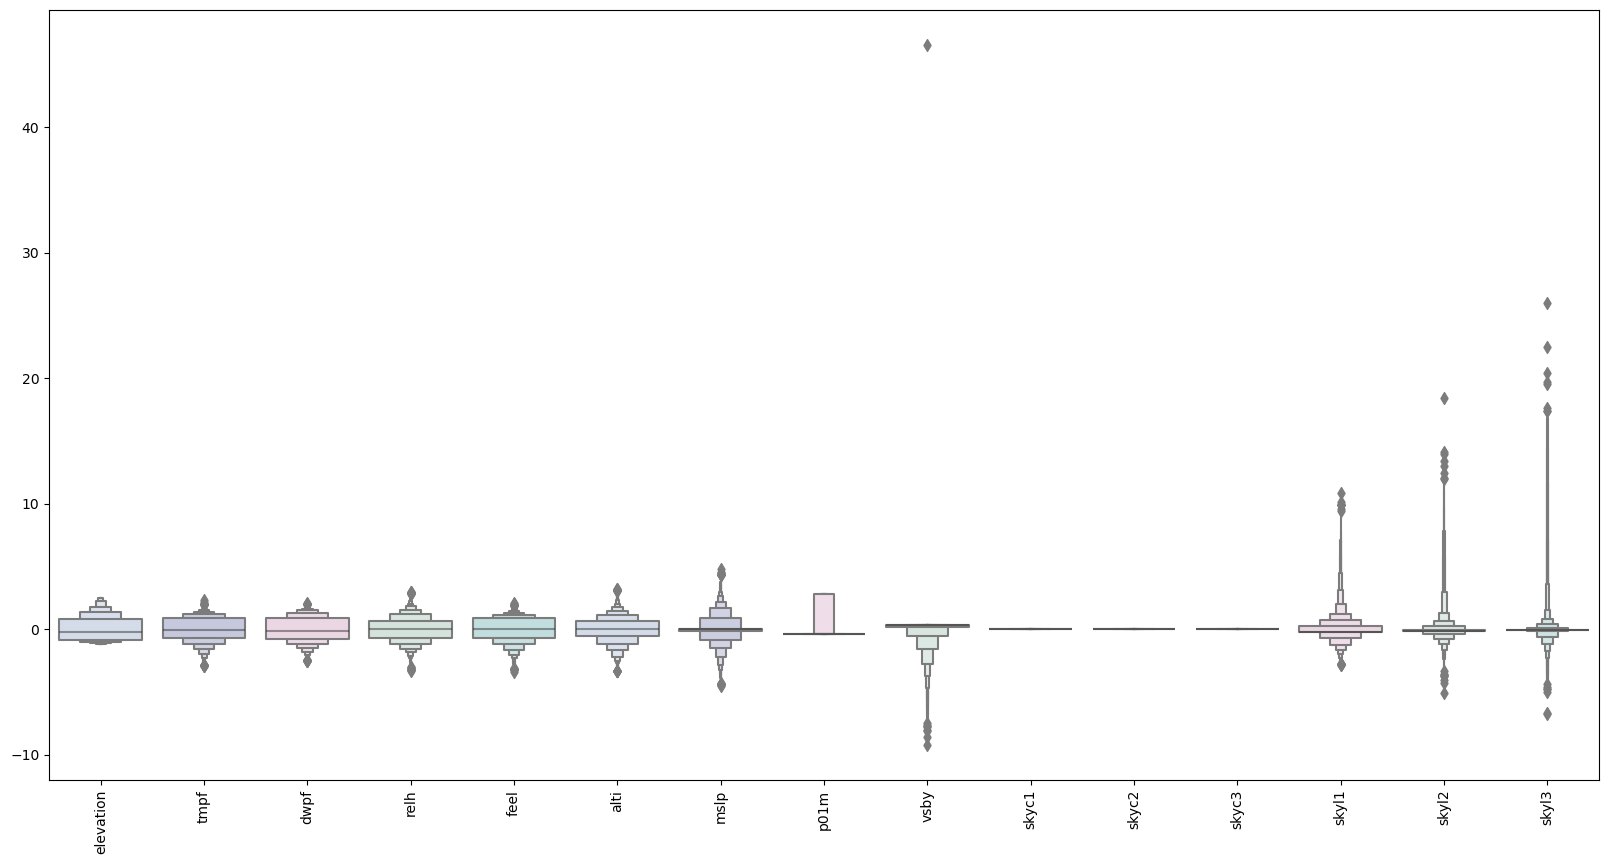

In [85]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [86]:
features

,elevation,tmpf,dwpf,relh,feel,alti,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,2.519148,-1.131437,-0.404363,2.513253,-1.078599,1.198113,2.020280,-0.35401,-7.316977,0.0,0.0,0.0,-2.791621,-0.827511,-0.461525
1,2.519148,-0.921434,-0.207839,2.439494,-0.945779,1.247135,2.116890,-0.35401,-6.523090,0.0,0.0,0.0,-2.508845,-0.257423,-0.033211
2,2.519148,-0.535743,-0.055916,1.547106,-0.508106,1.215846,1.693454,-0.35401,-2.857019,0.0,0.0,0.0,-0.977564,-0.110304,-0.033211
3,2.519148,-0.239459,-0.237442,-0.165683,-0.217566,0.679751,0.683852,-0.35401,0.364266,0.0,0.0,0.0,-0.235051,-0.110304,-0.033211
4,2.519148,0.134796,-0.414063,-1.496348,0.157670,0.127458,-0.384245,-0.35401,0.364266,0.0,0.0,0.0,2.059603,0.648281,-0.033211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15655,0.234665,-0.624861,-0.458766,0.353731,-0.536318,0.027452,0.317790,-0.35401,0.364266,0.0,0.0,0.0,0.912276,0.211520,-0.033211
15656,0.234665,-0.430183,-0.074573,1.049323,-0.322710,-0.178443,0.012931,-0.35401,-0.723417,0.0,0.0,0.0,-0.010222,0.441394,-0.033211
15657,0.234665,-0.459592,-0.458766,0.517412,-0.402001,0.913781,1.428452,-0.35401,-0.417888,0.0,0.0,0.0,-0.235051,-0.110304,-0.033211
15658,0.234665,-0.114143,-0.594772,-1.193572,-0.083912,0.572584,0.850936,-0.35401,0.364266,0.0,0.0,0.0,-0.235051,-0.110304,-0.033211


In [87]:
#full data for 
features["p01m_tmrw"] = target

#Dropping with outlier
features = features[(features["vsby"]<-5)]
features = features[(features["skyl1"]<5)]
features = features[(features["skyl2"]<5)&(features["skyl2"]>-3)]
features = features[(features["skyl3"]<5)&(features["skyl3"]>-3)]

features.shape

(86, 16)

C:\Users\yooki\anaconda3\envs\py\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


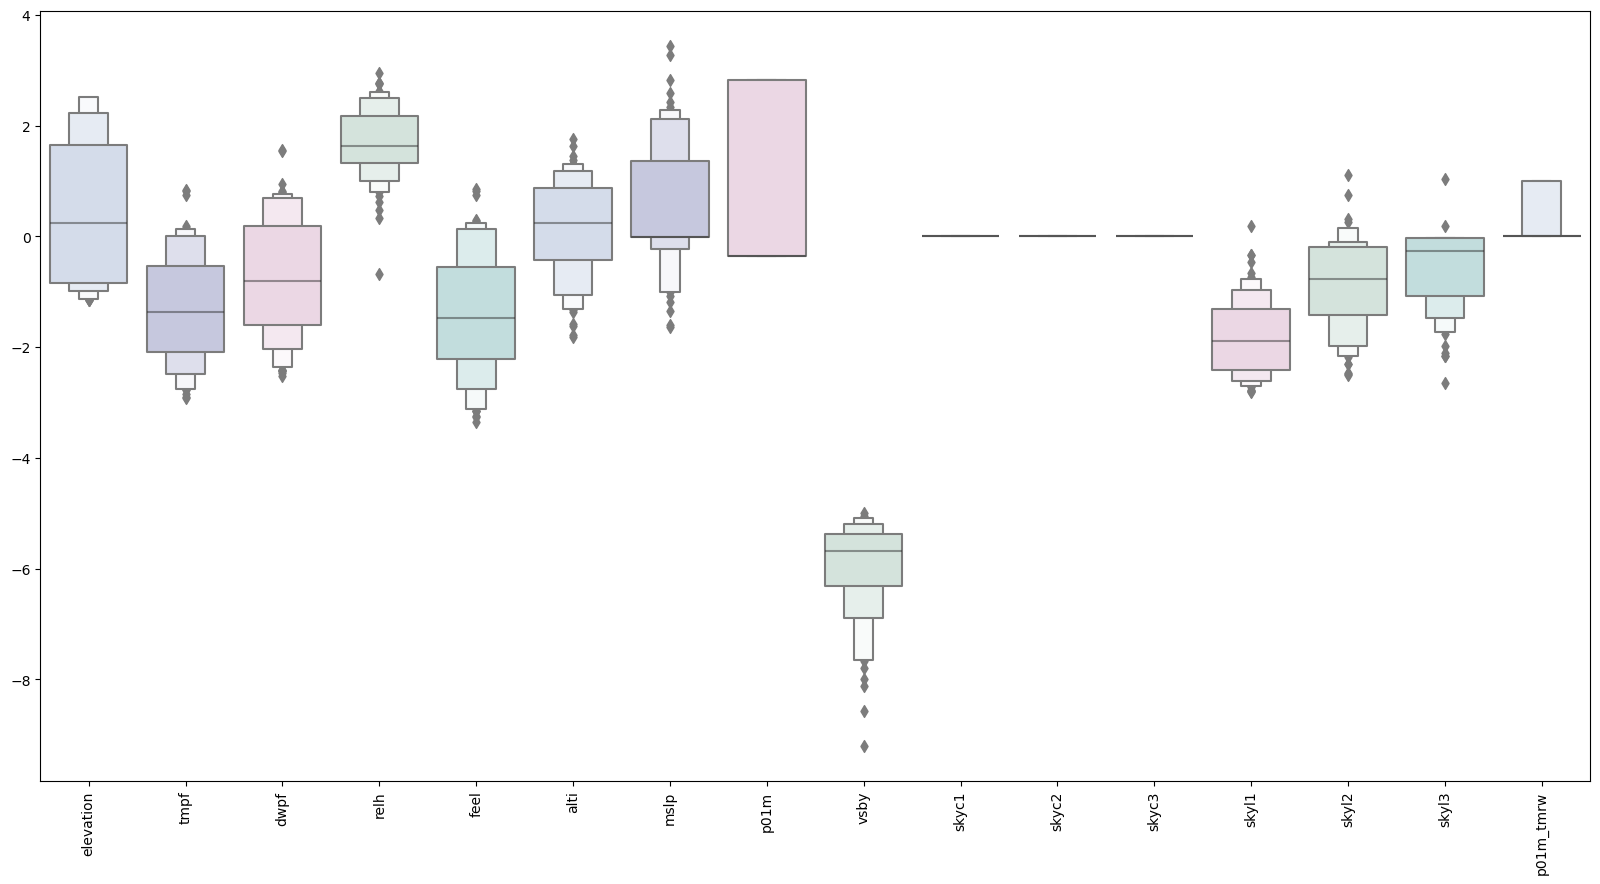

In [88]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [89]:
# prepare test and training data
X = features.drop(["p01m_tmrw"], axis=1)
y = features["p01m_tmrw"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(86, 15)

In [90]:
# ANN
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150


C:\Users\yooki\anaconda3\envs\py\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2/2 [==============================] - 1s 353ms/step - loss: 0.6931 - accuracy: 0.5556 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 2/150
2/2 [==============================] - 0s 44ms/step - loss: 0.6931 - accuracy: 0.8148 - val_loss: 0.6930 - val_accuracy: 1.0000
Epoch 3/150
2/2 [==============================] - 0s 45ms/step - loss: 0.6930 - accuracy: 0.8148 - val_loss: 0.6929 - val_accuracy: 1.0000
Epoch 4/150
2/2 [==============================] - 0s 46ms/step - loss: 0.6930 - accuracy: 0.8148 - val_loss: 0.6928 - val_accuracy: 1.0000
Epoch 5/150
2/2 [==============================] - 0s 46ms/step - loss: 0.6929 - accuracy: 0.8148 - val_loss: 0.6927 - val_accuracy: 1.0000
Epoch 6/150
2/2 [==============================] - 0s 44ms/step - loss: 0.6928 - accuracy: 0.8148 - val_loss: 0.6926 - val_accuracy: 1.0000
Epoch 7/150
2/2 [==============================] - 0s 44ms/step - loss: 0.6928 - accuracy: 0.8148 - val_loss: 0.6925 - val_accuracy: 1.0000
Epoch 8/150
2/2 [==============

2/2 [==============================] - 0s 43ms/step - loss: 0.6894 - accuracy: 0.8148 - val_loss: 0.6872 - val_accuracy: 1.0000
Epoch 60/150
2/2 [==============================] - 0s 41ms/step - loss: 0.6895 - accuracy: 0.8148 - val_loss: 0.6871 - val_accuracy: 1.0000
Epoch 61/150
2/2 [==============================] - 0s 41ms/step - loss: 0.6893 - accuracy: 0.8148 - val_loss: 0.6870 - val_accuracy: 1.0000
Epoch 62/150
2/2 [==============================] - 0s 41ms/step - loss: 0.6893 - accuracy: 0.8148 - val_loss: 0.6869 - val_accuracy: 1.0000
Epoch 63/150
2/2 [==============================] - 0s 44ms/step - loss: 0.6891 - accuracy: 0.8148 - val_loss: 0.6867 - val_accuracy: 1.0000
Epoch 64/150
2/2 [==============================] - 0s 41ms/step - loss: 0.6892 - accuracy: 0.8148 - val_loss: 0.6866 - val_accuracy: 1.0000
Epoch 65/150
2/2 [==============================] - 0s 41ms/step - loss: 0.6890 - accuracy: 0.8148 - val_loss: 0.6865 - val_accuracy: 1.0000
Epoch 66/150
2/2 [========

2/2 [==============================] - 0s 47ms/step - loss: 0.6831 - accuracy: 0.8148 - val_loss: 0.6772 - val_accuracy: 1.0000
Epoch 118/150
2/2 [==============================] - 0s 47ms/step - loss: 0.6832 - accuracy: 0.8148 - val_loss: 0.6769 - val_accuracy: 1.0000
Epoch 119/150
2/2 [==============================] - 0s 46ms/step - loss: 0.6834 - accuracy: 0.8148 - val_loss: 0.6766 - val_accuracy: 1.0000
Epoch 120/150
2/2 [==============================] - 0s 47ms/step - loss: 0.6821 - accuracy: 0.8148 - val_loss: 0.6762 - val_accuracy: 1.0000
Epoch 121/150
2/2 [==============================] - 0s 46ms/step - loss: 0.6821 - accuracy: 0.8148 - val_loss: 0.6759 - val_accuracy: 1.0000
Epoch 122/150
2/2 [==============================] - 0s 41ms/step - loss: 0.6819 - accuracy: 0.8148 - val_loss: 0.6755 - val_accuracy: 1.0000
Epoch 123/150
2/2 [==============================] - 0s 43ms/step - loss: 0.6824 - accuracy: 0.8148 - val_loss: 0.6751 - val_accuracy: 1.0000
Epoch 124/150
2/2 [=

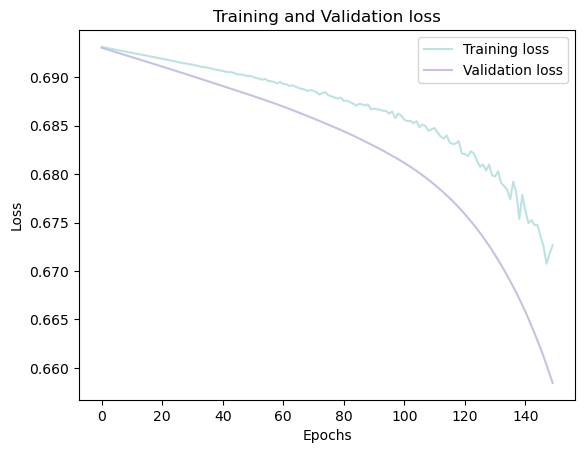

In [91]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

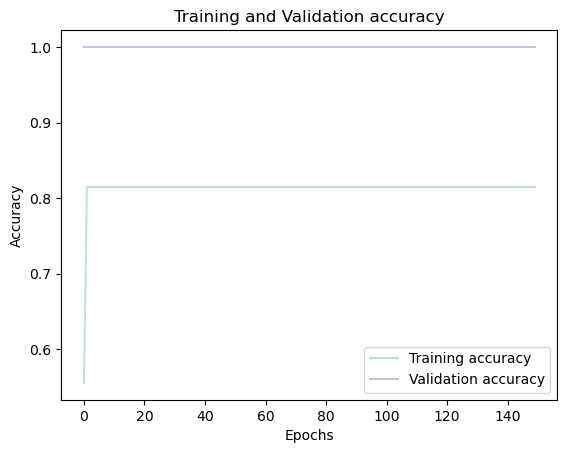

In [92]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 [==============================] - 0s 90ms/step


<AxesSubplot:>

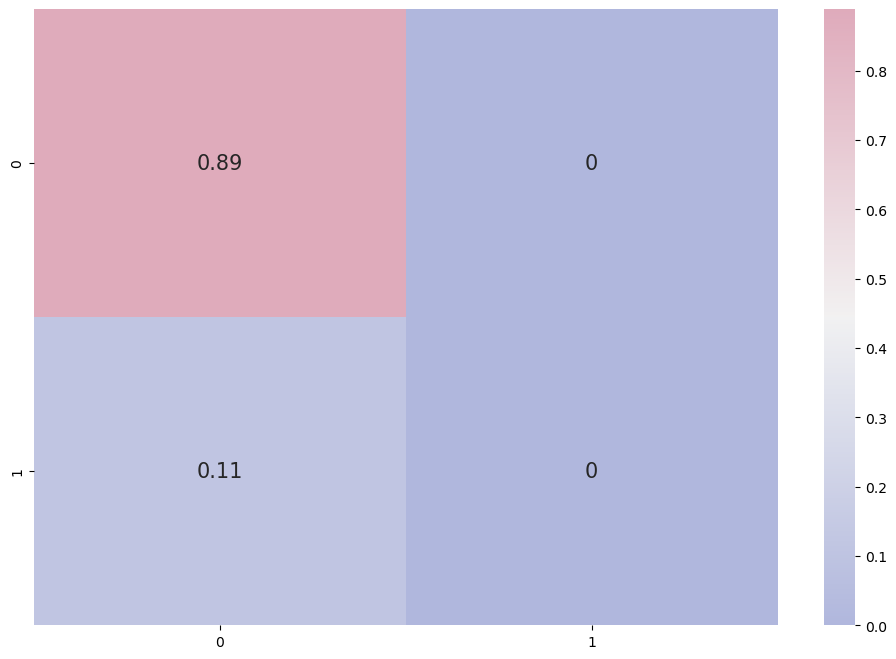

In [94]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



C:\Users\yooki\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yooki\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yooki\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
